In [172]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re, string, unicodedata
from pandas import DataFrame
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv


In [145]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
print(len(train))
train.head()

7613


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [146]:
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
print(len(test))
test.head()

3263


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


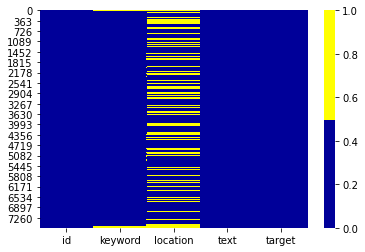

In [147]:
cols = train.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))

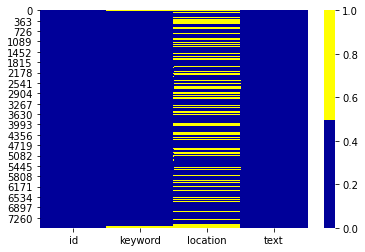

In [148]:
cols = test.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))

In [149]:
train.drop('keyword', axis=1, inplace=True)
test.drop('keyword', axis=1, inplace=True)
train.drop('location', axis=1, inplace=True)
test.drop('location', axis=1, inplace=True)

In [157]:
def remove_URL(sample):
    return re.sub(r"http\S+", "", sample)

def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    words = nltk.word_tokenize(sample)

    # Normalize
    return normalize(words)

In [168]:
vocabulary = []
new_train = []
for text in train['text']:
    new_text = preprocess(text)
    vocabulary.append(new_text)
    new_train.append(' '.join(new_text))

In [176]:
new_test = []
for text in test['text']:
    new_text = preprocess(text)
    new_test.append(' '.join(new_text))

In [163]:
tokens = [item for sublist in vocabulary for item in sublist]
print(len(tokens))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

71520


['nt',
 'like',
 'amp',
 'fire',
 'get',
 'new',
 'via',
 'people',
 'news',
 'one',
 'us',
 'video',
 '2',
 'emergency',
 'disaster',
 'would',
 'police',
 'still',
 'body',
 'got',
 'california',
 'burning',
 'crash',
 'back',
 'storm',
 'suicide',
 'time',
 'know',
 'man',
 'buildings',
 'day',
 'rt',
 'first',
 'see',
 'world',
 '3',
 'ca',
 'going',
 'bomb',
 'fires',
 'nuclear',
 'love',
 'today',
 'attack',
 'two',
 'youtube',
 'dead',
 'killed',
 'go',
 'train']

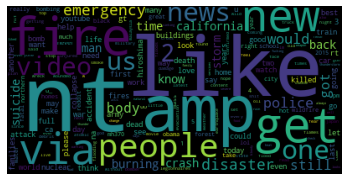

In [186]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [179]:
final_train = DataFrame(new_train,columns=['text'])
final_train['id'] = train['id']
final_train['target'] = train['target']
final_train.head()

,text,id,target
0,deeds reason earthquake may allah forgive us,1,1
1,forest fire near la ronge sask canada,4,1
2,residents asked shelter place notified officer...,5,1
3,13000 people receive wildfires evacuation orde...,6,1
4,got sent photo ruby alaska smoke wildfires pou...,7,1


In [178]:
final_test = DataFrame(new_test,columns=['text'])
final_test['id'] = test['id']
final_test.head()

,text,id
0,happened terrible car crash,0
1,heard earthquake different cities stay safe ev...,2
2,forest fire spot pond geese fleeing across str...,3
3,apocalypse lighting spokane wildfires,9
4,typhoon soudelor kills 28 china taiwan,11


In [180]:
X_train = final_train.loc[:7613, 'text'].values
y_train = final_train.loc[:7613, 'target'].values
X_test = final_test.loc[:3263, 'text'].values

In [181]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(7613, 17663) (3263, 17663)


In [182]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [183]:
predicted = clf.predict(test_vectors)
output = pd.DataFrame({'id': test.id, 'target': predicted})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
